In [2]:
import numpy as np
import time

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

from gbgpu.gbgpu import GBGPU
from gbgpu.thirdbody import GBGPUThirdBody


from gbgpu.utils.constants import *
from gbgpu.utils.utility import *
from Noise import AnalyticNoise

from utils import add_Signals, adjust_frequency_range, add_Signals2


In [3]:
gb1 = GBGPU(use_gpu=False)
gb2 = GBGPU(use_gpu=False)


In [4]:
dt = 10.0    # Sample rate (Nyquist is safely larger than the maximum frequency we will encounter) 
Tobs = 1* YEAR/36  #Temps d'observation


# number of points in waveform
# if None, will determine inside the code based on amp, f0 (and P2 if running third-body waveform)
N = 128

# number of binaries to batch
num_bin = 100

# parameters
amp1 = 2e-21  # amplitude
f01 = 2e-3  # f0
fdot1 = 0 #7.538331e-15  # fdot
fddot1 = 0.0 # fddot
phi01 = 0  # initial phase
iota1 = 0  # inclination
psi1 = 0  # polarization angle
lam1 = 0  # ecliptic longitude
beta_sky1 = 0  # ecliptic latitude


amp2 = amp1  # amplitude
f02 = f01  # f0
fdot2 = 0  # fdot
fddot2 = 0.0 # fddot
phi02 = 0  # initial phase
iota2 = 0  # inclination
psi2 = 0  # polarization angle
lam2 = 0   # ecliptic longitude
beta_sky2 = 0 # ecliptic latitude



/tmp/ipykernel_6777/3927546926.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_6777/3927546926.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_6777/3927546926.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_6777/3927546926.py:69: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


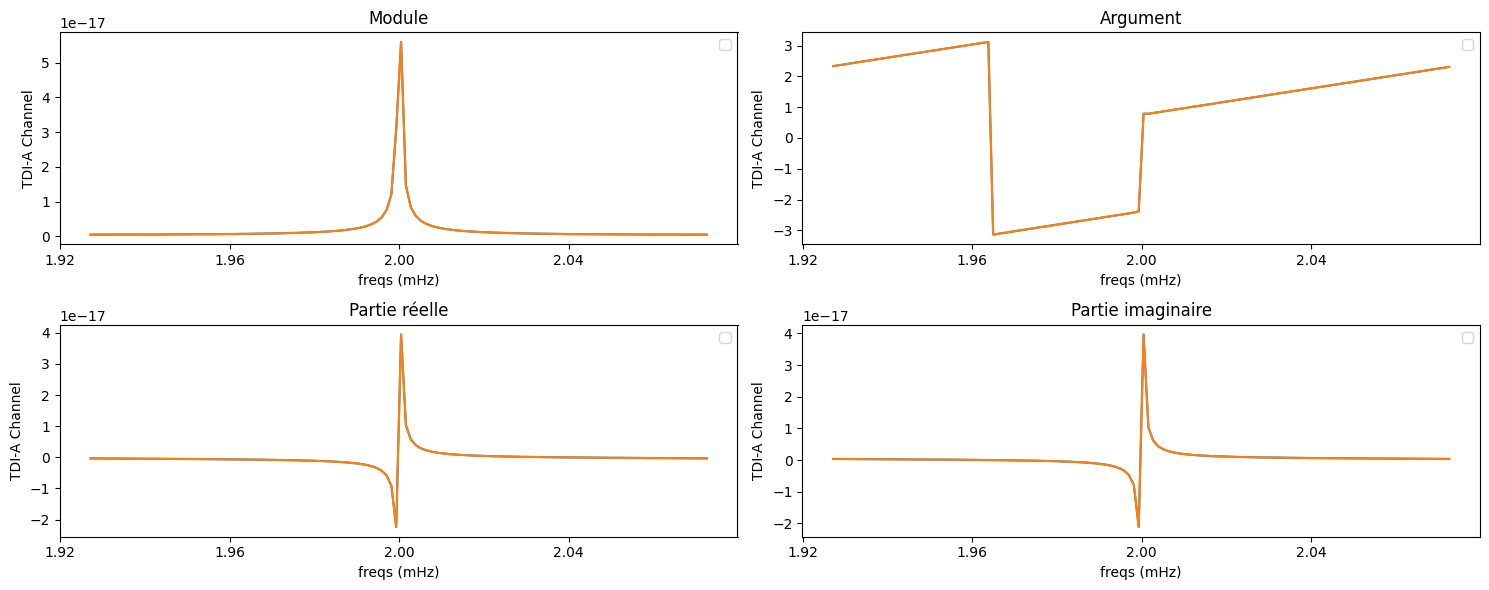

In [5]:
params1 = np.array(
    [amp1, f01, fdot1, fddot1, phi01, iota1, psi1, lam1, beta_sky1,]
)

params2 = np.array(
    [amp2, f02, fdot2, fddot2, phi02, iota2, psi2, lam2, beta_sky2,]
)


gb1.run_wave(*params1, N=N, dt=dt, T=Tobs, oversample=2)

gb2.run_wave(*params2, N=N, dt=dt, T=Tobs, oversample=2)



A0 = gb1.A[0]
A1 = gb2.A[0]
freqs1 = 1000*gb1.freqs[0]
freqs2 = 1000*gb2.freqs[0]


x = 2
y = 1.0001*x

# signal from first binary
fig, axs = plt.subplots(2, 2, figsize=(15, 6))


# Premier graphique (en haut à gauche)
axs[0, 0].plot(freqs1, np.abs(A0))
axs[0, 0].plot(freqs2, np.abs(A1))
# axs[0, 0].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
# axs[0, 0].axvline(x=y, color='g', linestyle='--', label=f"x = {x}")
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
# axs[0,0].set_xlim([1.995, 2.005])
axs[0, 0].legend()

# Deuxième graphique (en haut à droite)
axs[0, 1].plot(freqs1, np.angle(A0))
axs[0, 1].plot(freqs2, np.angle(A1))
# axs[0, 1].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
axs[0, 1].set_title("Argument")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()

# Troisième graphique (en bas à gauche)
axs[1, 0].plot(freqs1, A0.real)
axs[1, 0].plot(freqs2, A1.real)
# axs[1, 0].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
axs[1, 0].set_title("Partie réelle")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Quatrième graphique (en bas à droite)
axs[1, 1].plot(freqs1, A0.imag)
axs[1, 1].plot(freqs2, A1.imag)
# axs[1, 1].axvline(x=x, color='r', linestyle='--', label=f"x = {x}")
axs[1, 1].set_title("Partie imaginaire")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()




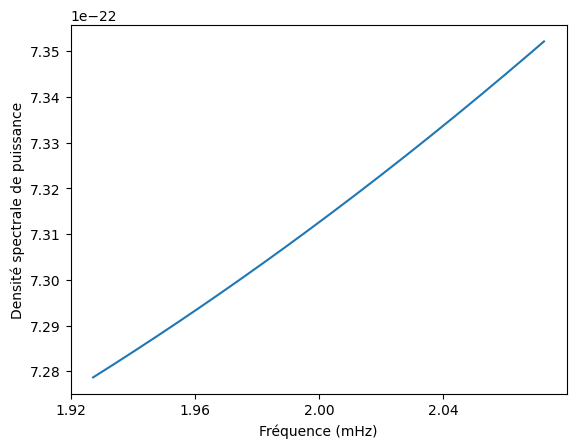

In [6]:
noise = AnalyticNoise(freqs1*1e-3)
psd_A, psd_E = noise.psd(option="A"), noise.psd(option="E")




fig, ax = plt.subplots()  # Créer une figure avec un axe
ax.plot(freqs1, np.sqrt(psd_A))  # Tracer la courbe
ax.set_xlabel("Fréquence (mHz)")
ax.set_ylabel("Densité spectrale de puissance")
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))  # Limiter le nombre de ticks X

plt.show()

/tmp/ipykernel_6777/1587332933.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_6777/1587332933.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_6777/1587332933.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_6777/1587332933.py:84: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


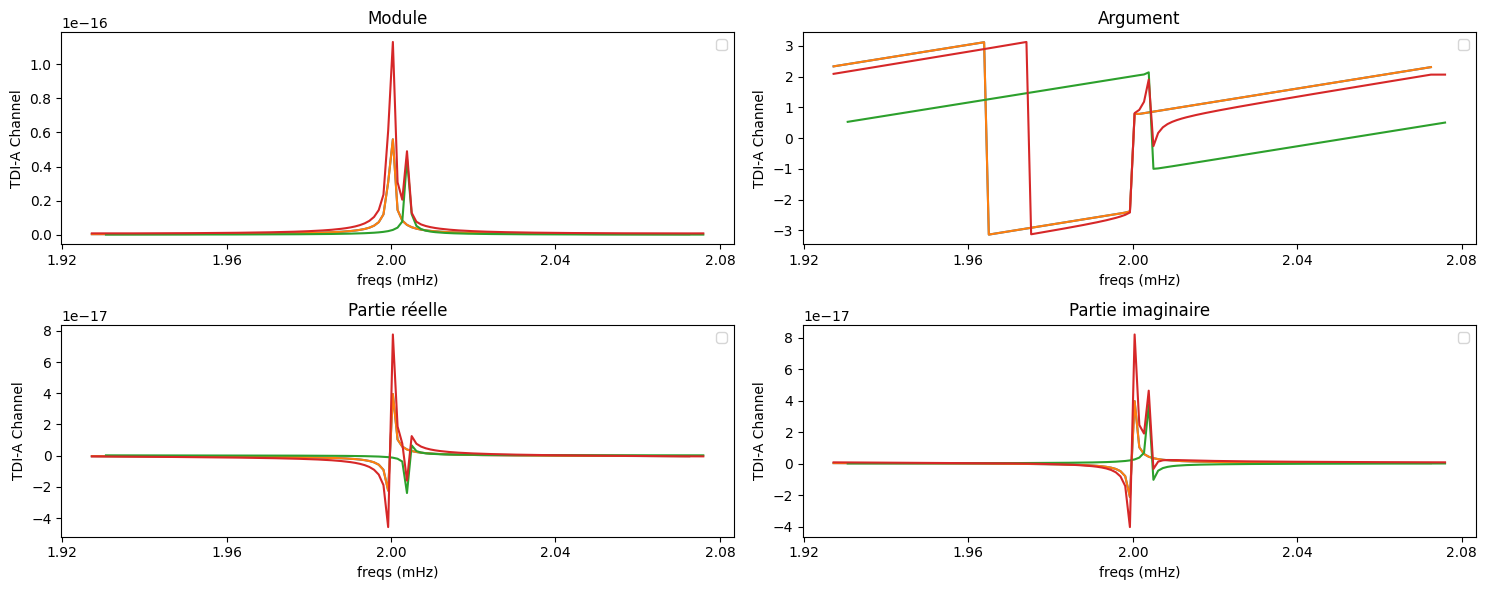

In [7]:
gb3 = GBGPU(use_gpu=False)



amp3 = amp1  # amplitude
f03 = 1.002*f01  # f0
fdot3 = fdot1  # fdot
fddot3 = 0.0 # fddot
phi03 = 0.1  # initial phase
iota3 = 0.2  # inclination
psi3 = 0.3  # polarization angle
lam3 = 0.4  # ecliptic longitude
beta_sky3 = 0.5  # ecliptic latitude

params3 = np.array(
    [amp3, f03, fdot3, fddot3, phi03, iota3, psi3, lam3, beta_sky3,]
)

gb3.run_wave(*params3, N=N, dt=dt, T=Tobs, oversample=2)

A2 = gb3.A[0]
freqs3 = 1000*gb3.freqs[0]



Signals = np.column_stack((A0, A1, A2))
Freqs = np.column_stack((freqs1, freqs2, freqs3))


S, f = add_Signals(Signals, Freqs, N)






# signal from first binary
fig, axs = plt.subplots(2, 2, figsize=(15, 6))


# Premier graphique (en haut à gauche)
axs[0, 0].plot(freqs1, np.abs(A0))
axs[0, 0].plot(freqs2, np.abs(A1))
axs[0, 0].plot(freqs3, np.abs(A2))
axs[0, 0].plot(f, np.abs(S))
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
#axs[0,0].set_xlim([1.997, 2.005])
axs[0, 0].legend()

# Deuxième graphique (en haut à droite)
axs[0, 1].plot(freqs1, np.angle(A0))
axs[0, 1].plot(freqs2, np.angle(A1))
axs[0, 1].plot(freqs3, np.angle(A2))
axs[0, 1].plot(f, np.angle(S))
axs[0, 1].set_title("Argument")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()

# Troisième graphique (en bas à gauche)
axs[1, 0].plot(freqs1, A0.real)
axs[1, 0].plot(freqs2, A1.real)
axs[1, 0].plot(freqs3, A2.real)
axs[1, 0].plot(f, S.real)
axs[1, 0].set_title("Partie réelle")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Quatrième graphique (en bas à droite)
axs[1, 1].plot(freqs1, A0.imag)
axs[1, 1].plot(freqs2, A1.imag)
axs[1, 1].plot(freqs3, A2.imag)
axs[1, 1].plot(f, S.imag)
axs[1, 1].set_title("Partie imaginaire")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

1
1


/tmp/ipykernel_6777/1635325664.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_6777/1635325664.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_6777/1635325664.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_6777/1635325664.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


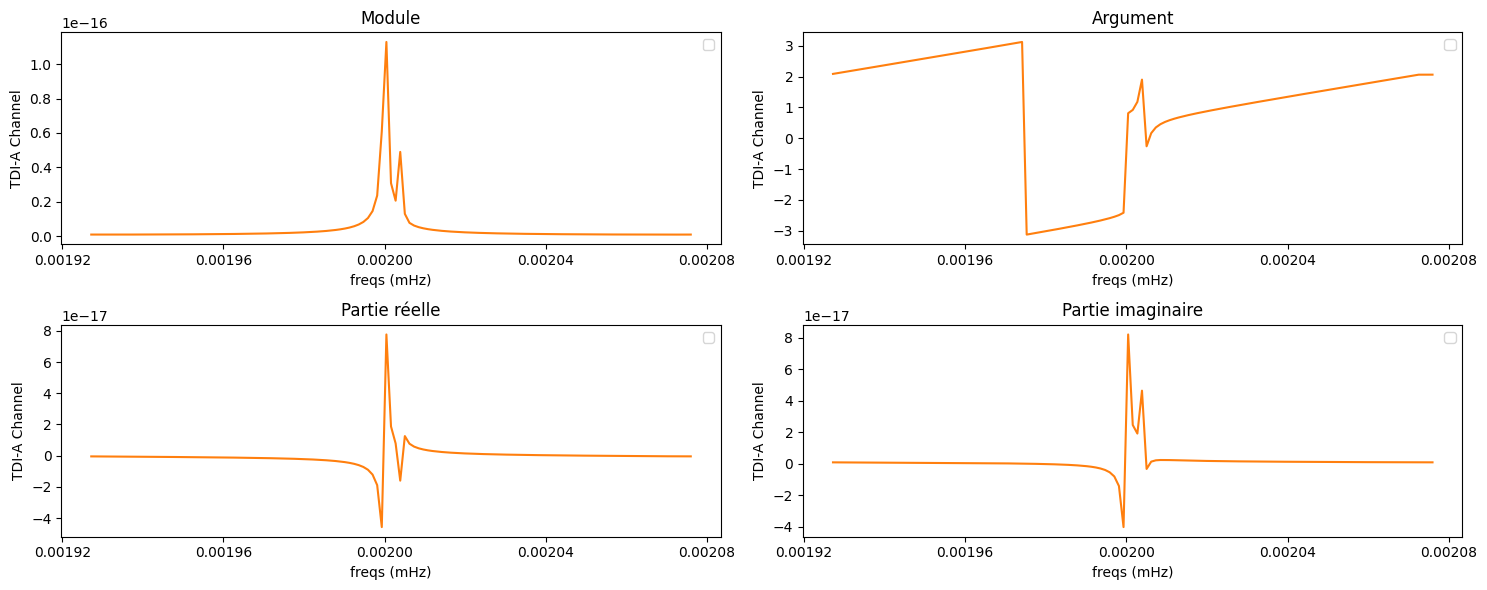

In [8]:

freqs1 = gb1.freqs[0]
freqs2 = gb2.freqs[0]
freqs3 = gb3.freqs[0]

Freqs = np.column_stack((freqs1, freqs2, freqs3))
S, f = add_Signals(Signals, Freqs, N)
signal_adjusted, frequencies_adjusted = adjust_frequency_range(S, f, 1e-6)

print(len(frequencies_adjusted))
print(len(signal_adjusted))
# signal from first binary
fig, axs = plt.subplots(2, 2, figsize=(15, 6))


# Premier graphique (en haut à gauche)
axs[0, 0].plot(frequencies_adjusted, np.abs(signal_adjusted))
axs[0, 0].plot(f, np.abs(S))
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
#axs[0,0].set_xlim([1.997, 2.005])
axs[0, 0].legend()

# Deuxième graphique (en haut à droite)
axs[0, 1].plot(frequencies_adjusted, np.angle(signal_adjusted))
axs[0, 1].plot(f, np.angle(S))
axs[0, 1].set_title("Argument")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()

# Troisième graphique (en bas à gauche)
axs[1, 0].plot(frequencies_adjusted, signal_adjusted.real)
axs[1, 0].plot(f, S.real)
axs[1, 0].set_title("Partie réelle")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Quatrième graphique (en bas à droite)
axs[1, 1].plot(frequencies_adjusted, signal_adjusted.imag)
axs[1, 1].plot(f, S.imag)
axs[1, 1].set_title("Partie imaginaire")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

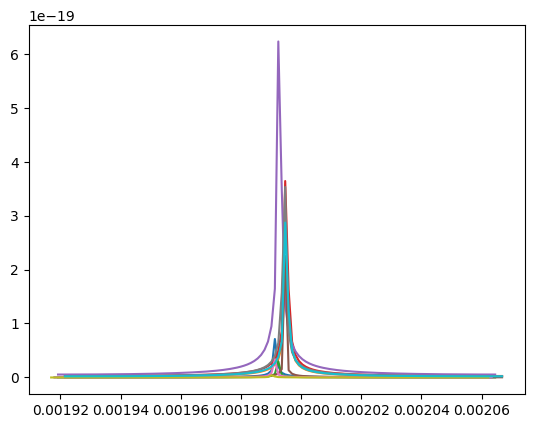

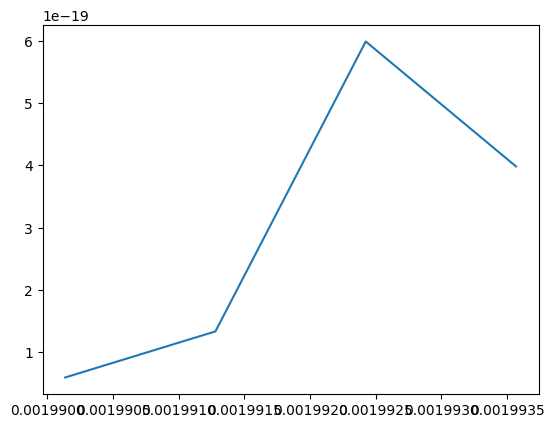

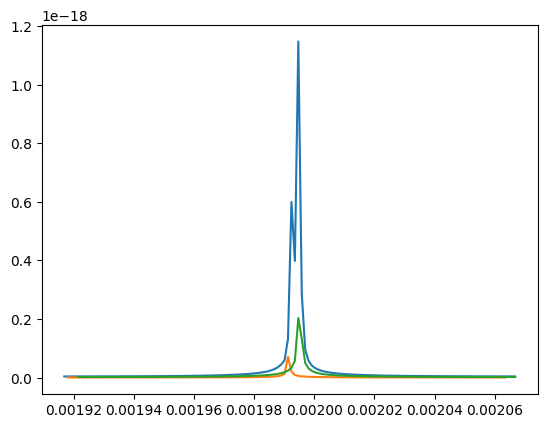

In [9]:



num_samples = 10

#f0 = np.random.uniform(0.0019975, 0.0019975 + 10e-6 , num_samples)
f0 = np.random.uniform(0.00199, 0.00199 + 6*1e-6 , num_samples)
amp = np.random.uniform(3e-23, 1e-24, num_samples)
fdot = np.random.uniform(7.538331e-16, 7.538331e-18 , num_samples)    
fddot = np.zeros(num_samples)
phi0 = np.random.uniform(0, 2*np.pi, num_samples) 
iota = np.random.uniform(0, 2*np.pi, num_samples) 
psi = np.random.uniform(0, 2*np.pi, num_samples)  
lam = np.random.uniform(0, 2*np.pi, num_samples) 
beta_sky = np.random.uniform(0,2*np.pi , num_samples) 


all_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

gb = GBGPU(use_gpu=False)
gb.run_wave(*all_parameters.T, N = N, dt = dt, T = Tobs, oversample = 1)

Signals = np.array([gb.A[i] for i in range(num_samples)]).T
Freqs = np.array([gb.freqs[i] for i in range(num_samples)]).T



plt.figure()
for i in range(num_samples):
    plt.plot(Freqs[:,i], np.abs(Signals[:,i]))

# plt.plot(Freqs[:,1], np.abs(Signals[:,1]))
siiiii, freeee = add_Signals2(Signals, Freqs)

S, f = adjust_frequency_range(siiiii, freeee, 5*1e-6 )

plt.figure()
plt.plot(f, np.abs(S))



plt.figure()
plt.plot(freeee, np.abs(siiiii))
plt.plot(Freqs[:,0], np.abs(Signals[:,0]))
plt.plot(Freqs[:,1], np.abs(Signals[:,1]))





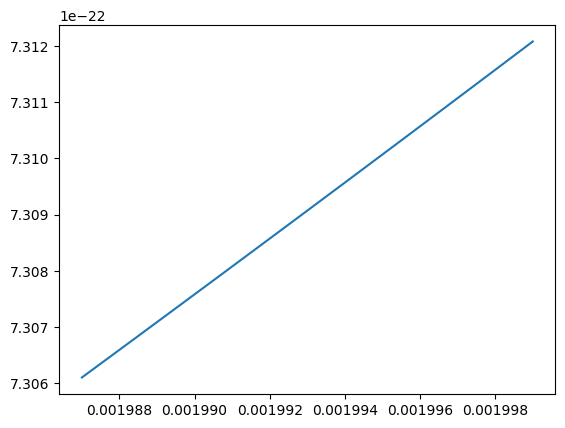

In [10]:
df = 1./Tobs
dt = 15.0
N = 128
num_samples = 3

f_min = 0.00199
f_max = f_min + 6*1e-6
f0 = np.random.uniform(f_min, f_max , num_samples)
amp = np.random.uniform(1e-23, 1e-21, num_samples)
fdot = np.random.uniform(7.538331e-16, 7.538331e-18 , num_samples)    
fddot = 1e-40*np.ones(num_samples)
phi0 = np.random.uniform(0, 2*np.pi, num_samples) 
iota = np.random.uniform(0, 2*np.pi, num_samples) 
psi = np.random.uniform(0, 2*np.pi, num_samples)  
lam = np.random.uniform(0, 2*np.pi, num_samples) 
beta_sky = np.random.uniform(0,2*np.pi , num_samples) 


all_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

gb = GBGPU(use_gpu=False)
gb.run_wave(*all_parameters.T, N = N, dt = dt, T = Tobs, oversample = 1)

f_min0 = f_min - 3*1e-6
f_max0 = f_max + 3*1e-6
num_bins = int((f_max0 - f_min0) / df) + 1
sample_frequencies = np.linspace(f_min0, f_max0, num=num_bins)

noise = AnalyticNoise(sample_frequencies)
psd_A  = noise.psd(option='A')
asd_A = np.sqrt(psd_A)

plt.plot(sample_frequencies, asd_A)





In [11]:
k_min = round(f_min0/df)
k_max = round(f_max0/df)
num = len(sample_frequencies)

# These indices describe how to stitch the waveform into the larger frequency grid.
i_start = (gb.start_inds - k_min).astype(np.int32)
i_end = (gb.start_inds - k_min + gb.N).astype(np.int32)

# PyTorch by default uses float32, and that should be sufficient for our purposes.
# Here we use complex64 since the frequency-domain strain is complex.

A_whitened = np.empty((num_samples, num), dtype=np.complex64)

for i in range(num_samples):
    x = np.zeros(num, dtype=np.complex128)
    x[i_start[i]:i_end[i]] = gb.A[i]
    x *= np.sqrt(4 * df) / asd_A
    A_whitened[i] = x

# plt.plot(sample_frequencies, A_whitened[0].real)
# z = A_whitened[0].real + A_whitened[1].real
# plt.plot(sample_frequencies, z)

waveforms = np.hstack((A_whitened.real, A_whitened.imag))

plt.plot(waveforms[0])
plt.plot(waveforms[1])


print(A_whitened.shape)

ValueError: could not broadcast input array from shape (128,) into shape (11,)

In [ ]:
sampling_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

parameters_mean = np.mean(sampling_parameters, axis=0)
parameters_std = np.std(sampling_parameters, axis=0)

parameters_standardized = (sampling_parameters - parameters_mean) / parameters_std
parameters_standardized = parameters_standardized.astype(np.float32)


waveforms = np.hstack((A_whitened.real, A_whitened.imag))

/tmp/ipykernel_40314/1361762610.py:6: RuntimeWarning: invalid value encountered in divide
  parameters_standardized = (sampling_parameters - parameters_mean) / parameters_std


In [ ]:
df = 1./Tobs
dt = 15.0
N = 128
num_samples = 10

f_min = 0.00199
f_max = f_min + 2*1e-6
f0 = np.random.uniform(f_min, f_max , num_samples)
amp = np.random.uniform(5*1e-22, 1e-21, num_samples)
fdot = np.random.uniform(7.538331e-16, 7.538331e-18 , num_samples)    
fddot = np.zeros(num_samples)  # np.random.uniform(1e-50, 1e-49, num_samples)
phi0 = np.random.uniform(0, 2*np.pi, num_samples) 
iota = np.random.uniform(0, 2*np.pi, num_samples) 
psi = np.random.uniform(0, 2*np.pi, num_samples)  
lam = np.random.uniform(0, 2*np.pi, num_samples) 
beta_sky = np.random.uniform(0,2*np.pi , num_samples) 


all_parameters = np.vstack((amp, f0, fdot, fddot, -phi0, iota, psi, lam, beta_sky)).T

gb = GBGPU(use_gpu=False)
gb.run_wave(*all_parameters.T, N = N, dt = dt, T = Tobs, oversample = 1)


f_min0 = f_min - 3 * 1e-6
f_max0 = f_max + 3 * 1e-6
num_bins = int((f_max0 - f_min0) / df) + 1
sample_frequencies = np.linspace(f_min0, f_max0, num=num_bins)

noise = AnalyticNoise(sample_frequencies)
psd_A = noise.psd(option="A")
asd_A = np.sqrt(psd_A)

k_min = round(f_min0 / df)
k_max = round(f_max0 / df)
num = len(sample_frequencies)

i_start = (gb.start_inds - k_min).astype(np.int32)
i_end = (gb.start_inds - k_min + gb.N).astype(np.int32)


A_whitened = np.empty((num_samples, num), dtype=np.complex64)


for i in range(num_samples):
    x = np.zeros(num, dtype=np.complex128)
    x[i_start[i] : i_end[i]] = gb.A[i]
    x = x * np.sqrt(4 * df) / asd_A
    A_whitened[i] = x

waveforms = np.hstack((A_whitened.real, A_whitened.imag))



ValueError: could not broadcast input array from shape (128,) into shape (7,)

/tmp/ipykernel_102975/1008346888.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_102975/1008346888.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()


ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

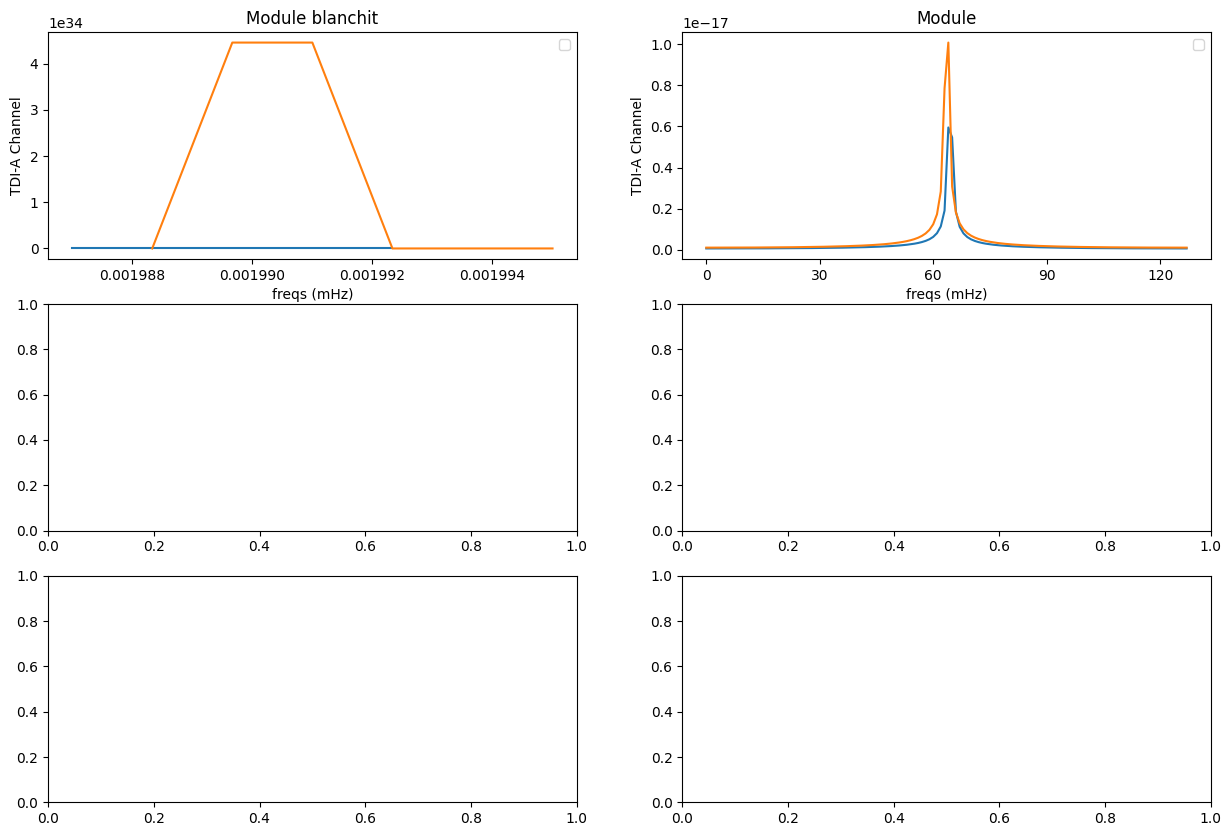

In [ ]:
fs = 10000

Aw0 = np.fft.fft(np.abs(A_whitened[0]))
Aw0 = Aw0[0:int(-1+ len(Aw0)/2)]
frequencies = np.fft.fftfreq(len(A_whitened[0]), 1/fs) 
frequencies = frequencies[frequencies > 0]

GB0 = np.fft.fft(np.abs(gb.A[0]))
GB0 = GB0[0:int(-1+ len(GB0)/2)]
frequencies1 = np.fft.fftfreq(len(gb.A[0]), 1/fs) 
frequencies1 = frequencies1[frequencies1 > 0] 


Aw1 = np.fft.fft(np.abs(A_whitened[1]))
GB1 = np.fft.fft(np.abs(gb.A[1]))

Aw1 = Aw1[0:int(-1+ len(Aw1)/2)]
GB1 = GB1[0:int(-1+ len(GB1)/2)]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))


axs[0, 0].plot(sample_frequencies, np.abs(A_whitened[0]))
axs[0, 0].plot(sample_frequencies, np.abs(A_whitened[1]))
axs[0, 0].set_title("Module blanchit")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 0].legend()

axs[0, 1].plot(np.abs(gb.A[0]))
axs[0, 1].plot(np.abs(gb.A[1]))
axs[0, 1].set_title("Module")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()


axs[1, 0].plot(frequencies, np.abs(Aw0))
axs[1, 0].plot(frequencies, np.abs(Aw1))
axs[1, 0].set_title("Module de la TF blanchit")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Deuxième graphique (en haut à droite)
axs[1, 1].plot(frequencies, np.angle(Aw0))
axs[1, 1].plot(frequencies, np.angle(Aw1))
axs[1, 1].set_title("Argument de la TF blanchit")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Troisième graphique (en bas à gauche)
axs[2, 0].plot(frequencies1, np.abs(GB0))
axs[2, 0].plot(frequencies1, np.abs(GB1))
axs[2, 0].set_title("Module de la TF")
axs[2, 0].set_xlabel("freqs (mHz)")
axs[2, 0].set_ylabel("TDI-A Channel")
axs[2, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 0].legend()

# Quatrième graphique (en bas à droite)
axs[2, 1].plot(frequencies1, np.angle(GB0))
axs[2, 1].plot(frequencies1, np.angle(GB1))
axs[2, 1].set_title("Argument de la TF")
axs[2, 1].set_xlabel("freqs (mHz)")
axs[2, 1].set_ylabel("TDI-A Channel")
axs[2, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

/tmp/ipykernel_40314/558586274.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 0].legend()
/tmp/ipykernel_40314/558586274.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0, 1].legend()
/tmp/ipykernel_40314/558586274.py:38: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 0].legend()
/tmp/ipykernel_40314/558586274.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()
/tmp/ipykernel_40314/558586274.py:56: UserWarning: No artists with labels found to p

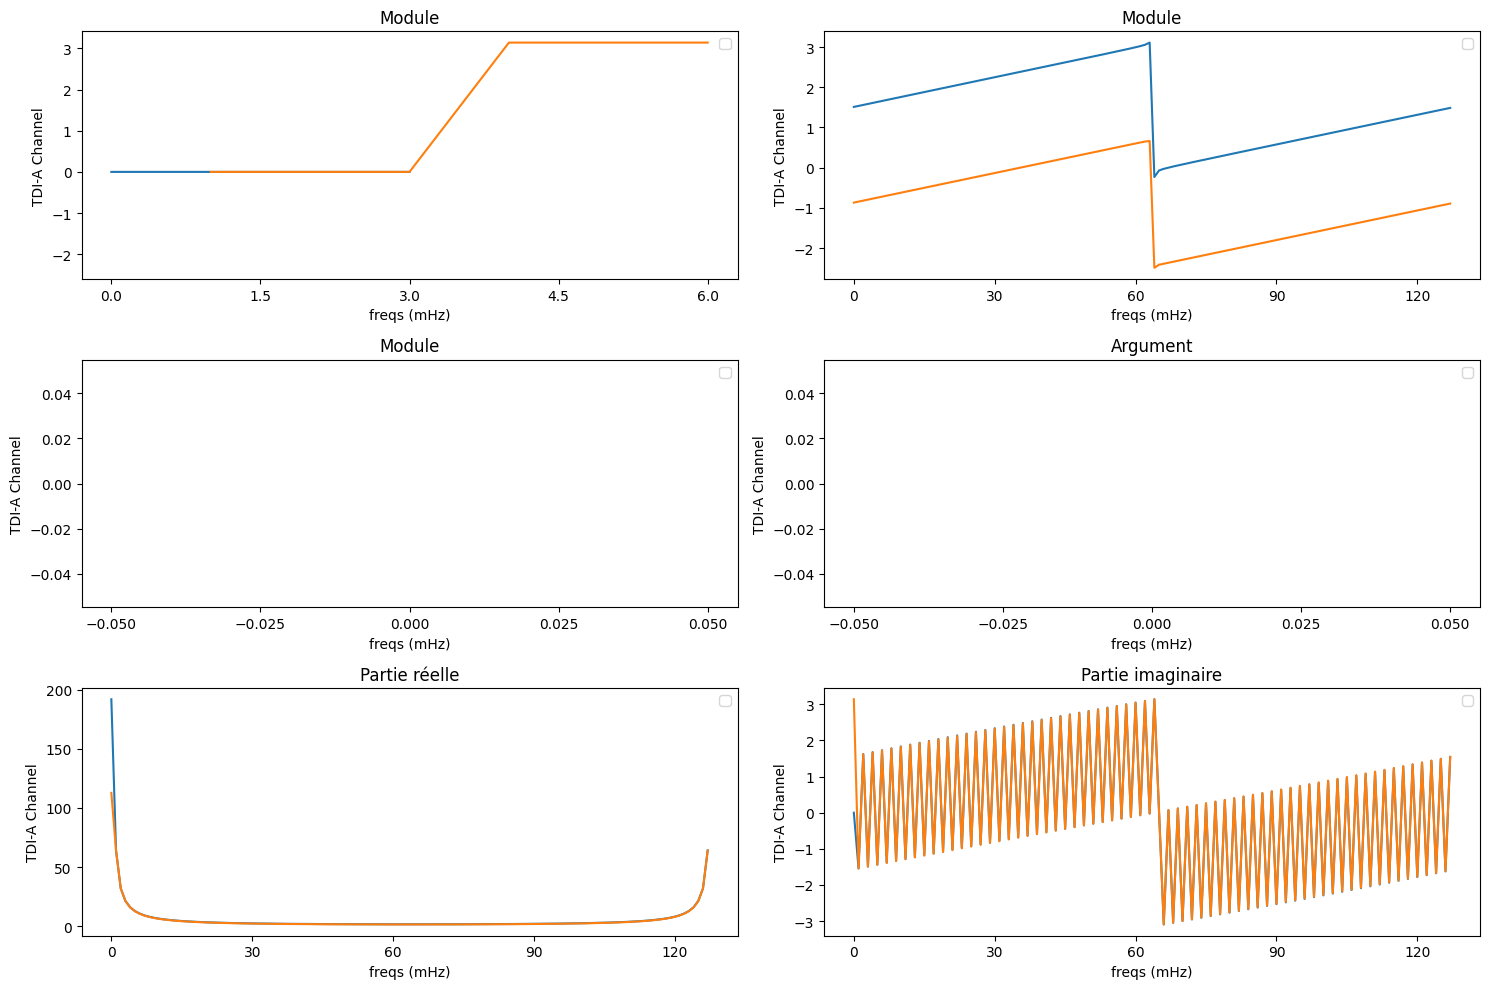

In [ ]:
fs = 10000

Aw0 = np.fft.fft(np.angle(A_whitened[0]))
GB0 = np.fft.fft(np.angle(gb.A[0]))

Aw1 = np.fft.fft(np.angle(A_whitened[1]))
GB1 = np.fft.fft(np.angle(gb.A[1]))




fig, axs = plt.subplots(3, 2, figsize=(15, 10))


axs[0, 0].plot(np.angle(A_whitened[0]))
axs[0, 0].plot(np.angle(A_whitened[1]))
axs[0, 0].set_title("Module")
axs[0, 0].set_xlabel("freqs (mHz)")
axs[0, 0].set_ylabel("TDI-A Channel")
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 0].legend()

axs[0, 1].plot(np.angle(gb.A[0]))
axs[0, 1].plot(np.angle(gb.A[1]))
axs[0, 1].set_title("Module")
axs[0, 1].set_xlabel("freqs (mHz)")
axs[0, 1].set_ylabel("TDI-A Channel")
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[0, 1].legend()


axs[1, 0].plot(np.abs(Aw0))
axs[1, 0].plot(np.abs(Aw1))
axs[1, 0].set_title("Module")
axs[1, 0].set_xlabel("freqs (mHz)")
axs[1, 0].set_ylabel("TDI-A Channel")
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 0].legend()

# Deuxième graphique (en haut à droite)
axs[1, 1].plot(np.angle(Aw0))
axs[1, 1].plot(np.angle(Aw1))
axs[1, 1].set_title("Argument")
axs[1, 1].set_xlabel("freqs (mHz)")
axs[1, 1].set_ylabel("TDI-A Channel")
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[1, 1].legend()

# Troisième graphique (en bas à gauche)
axs[2, 0].plot(np.abs(GB0))
axs[2, 0].plot(np.abs(GB1))
axs[2, 0].set_title("Partie réelle")
axs[2, 0].set_xlabel("freqs (mHz)")
axs[2, 0].set_ylabel("TDI-A Channel")
axs[2, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 0].legend()

# Quatrième graphique (en bas à droite)
axs[2, 1].plot(np.angle(GB0))
axs[2, 1].plot(np.angle(GB1))
axs[2, 1].set_title("Partie imaginaire")
axs[2, 1].set_xlabel("freqs (mHz)")
axs[2, 1].set_ylabel("TDI-A Channel")
axs[2, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))
axs[2, 1].legend()

# Ajuster l'espace entre les graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

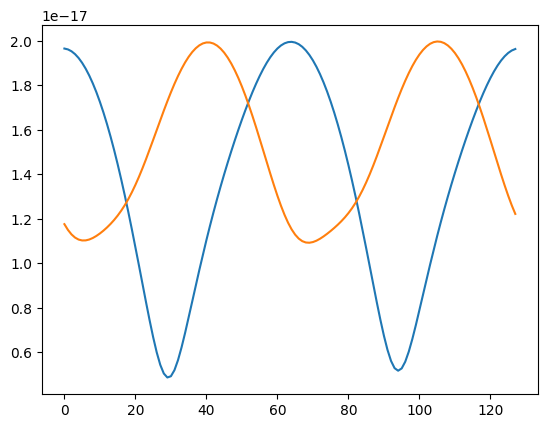

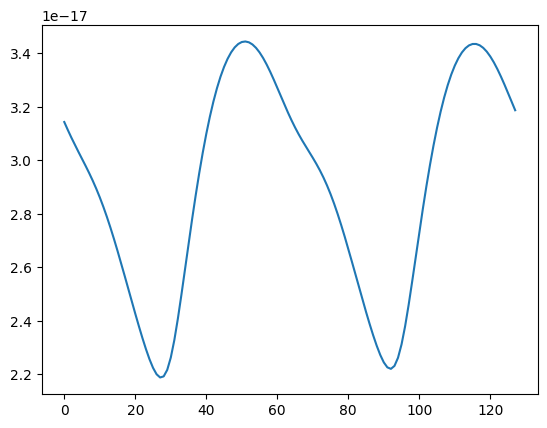

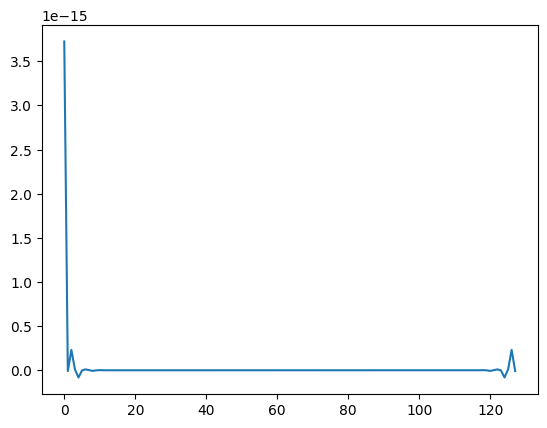

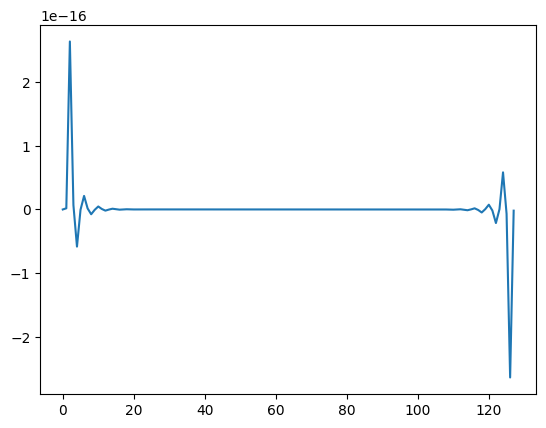

In [ ]:
gb1 = GBGPU(use_gpu=False)
gb2 = GBGPU(use_gpu=False)

dt = 10.0    # Sample rate (Nyquist is safely larger than the maximum frequency we will encounter) 
Tobs = 1* YEAR  #Temps d'observation


# number of points in waveform
# if None, will determine inside the code based on amp, f0 (and P2 if running third-body waveform)
N = 128

# number of binaries to batch


# parameters
amp1 = 2e-21  # amplitude
f01 = 2e-3  # f0
fdot1 = 7.538331e-18  # fdot
fddot1 = 0.0 # fddot
phi01 = 0  # initial phase
iota1 = 0  # inclination
psi1 = 0  # polarization angle
lam1 = 0  # ecliptic longitude
beta_sky1 = 0  # ecliptic latitude


# parameters
amp2 = 2e-21  # amplitude
f02 = 2e-3  # f0
fdot2 = 7.538331e-18  # fdot
fddot2 = 0.0 # fddot
phi02 = 0  # initial phase
iota2 = 0  # inclination
psi2 = 0  # polarization angle
lam2 = 2 #2.8  # ecliptic longitude
beta_sky2 = 0  # ecliptic latitude

c = 3e8
L = 2.5*1e9

params1 = np.array(
    [amp1, f01, fdot1, fddot1, phi01, iota1, psi1, lam1, beta_sky1,]
)

params2 = np.array(
    [amp2, f02, fdot2, fddot2, phi02, iota2, psi2, lam2, beta_sky2,]
)

gb1.run_wave(*params1, N=N, dt=dt, T=Tobs, oversample=2)
gb2.run_wave(*params2, N=N, dt=dt, T=Tobs, oversample=2)

A1 = gb1.A[0]
A2 = gb2.A[0]


A1 = np.fft.ifft(A1)
A2 = np.fft.ifft(A2)
plt.plot(np.abs(A1))
plt.plot(np.abs(A2))

somme = np.abs(A1) + np.abs(A2)

plt.figure()
plt.plot(np.abs(A1) + np.abs(A2))

plt.figure()

fourier = np.fft.fft(somme)

plt.plot(fourier.real)

plt.figure()

plt.plot(fourier.imag)




# f = gb.freqs[0]


# P = np.array([
#     [-1/np.sqrt(2),  0,           1/np.sqrt(2)],
#     [ 1/np.sqrt(6), -2/np.sqrt(6), 1/np.sqrt(6)],
#     [ 1/np.sqrt(3),  1/np.sqrt(3), 1/np.sqrt(3)]
# ])
# P_inv = P.T  

# V = np.vstack([A, E, T])  

# X, Y, Z = P_inv @ V 

# fstar = c/(2*np.pi*L)

# f = f/fstar

# fc = (4/1)*f*np.sin(f)*np.exp(-1j*f)

# XYZ = np.vstack([X, Y, Z]).T

# XYZ = XYZ/(0.5 * Tobs / N)


# XYZ_t = np.fft.ifft(XYZ)
# XYZ_t = XYZ_t / fc[:, np.newaxis]

# print(XYZ_t)


# plt.plot(XYZ_t[0].real)

12.035817634496706
13.706903881022079


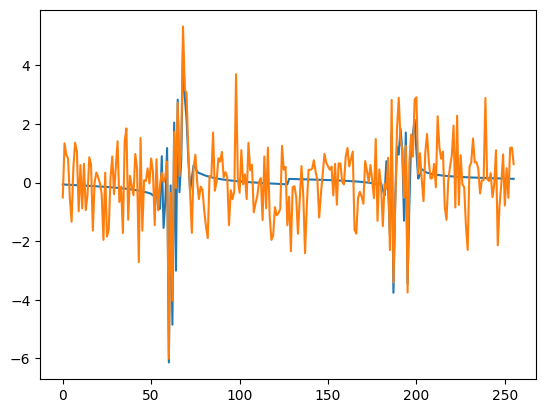

In [33]:
dt = 10.0    # Sample rate (Nyquist is safely larger than the maximum frequency we will encounter) 
Tobs = 1* YEAR  #Temps d'observation


# number of points in waveform
# if None, will determine inside the code based on amp, f0 (and P2 if running third-body waveform)
N = 128

# number of binaries to batch
num_bin = 100

# fstar = c/(2*np.pi*L)

# parameters
amp1 = 3e-23  # amplitude
f01 = 2e-3  # f0
fdot1 = 7.5e-18  # fdot
fddot1 = 0.0 # fddot
phi01 = 0  # initial phase
iota1 = 0  # inclination
psi1 = 0  # polarization angle
lam1 = 0  # ecliptic longitude
beta_sky1 = 0  # ecliptic latitude


params1 = np.array(
    [amp1, f01, fdot1, fddot1, phi01, iota1, psi1, lam1, beta_sky1,]
)



gb1.run_wave(*params1, N=N, dt=dt, T=Tobs, oversample=2)




freqs1 = gb1.freqs[0]
A0 = gb1.A[0] 
E0 = gb1.E[0]



noise = AnalyticNoise(freqs1)
psd_A = noise.psd(option="A")
asd_A = np.sqrt(psd_A)
psd_E = noise.psd(option="E")
asd_E = np.sqrt(psd_E)

df = freqs1[1] - freqs1[0]

ET = asd_A /np.sqrt(4 * df)

# bruit = np.random.normal(0,ET,size=A0.shape)
# bruit = np.fft.fft(bruit)

re = ET*np.random.normal(0,1,size=A0.shape)
im = ET*np.random.normal(0,1,size=A0.shape)

bruit = re +1j*im


signal = A0 + bruit
signal_blanchit = signal*np.sqrt(4 * df) / asd_A 


onde_blanchit = A0*np.sqrt(4 * df) / asd_A
onde_blanchit = np.hstack((onde_blanchit.real, onde_blanchit.imag))
res = onde_blanchit + np.random.normal(0,1,size=onde_blanchit.shape)

plt.plot(onde_blanchit)
plt.plot(res)
# plt.yscale('log')
# plt.plot(freqs1, np.abs(signal))


A = amp1

SNR1 = (A/2)*np.sqrt((Tobs*np.sin(f01/fstar)**2)/psd_A[0])
print(SNR1)




SNR2 = 4.0 * df * np.sum( np.abs(A0)**2 / psd_A ) #+ 4.0 * df * np.sum( np.abs(E0)**2 / psd_E )
SNR2 = np.sqrt(SNR2)

print(SNR2)

3145728
36
31457280.0


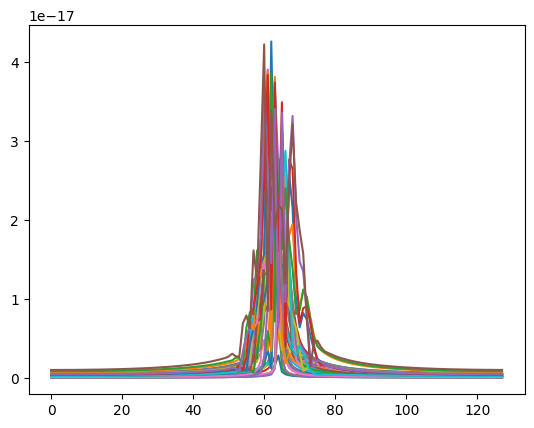

In [ ]:
def enveloppe(taille_fenetre, lam, beta):

    dt = 10.0       
    N = 128

    amp = 1e-22
    f0 = 2e-3 
    fdot = 7e-18
    fddot = 0.0 
    phi0 = 0  
    iota = 0 
    psi = 0 


    gb = GBGPU(use_gpu=False)

    params = np.array(
        [amp, f0, fdot, fddot, phi0, iota, psi, lam, beta,]
    ) 

    p = 1*YEAR
    n = int(1* YEAR/taille_fenetre)
    n_jour = int(n/(3600*24))

    print(n)
    print(n_jour)
    print(p)

    res = np.zeros(n_jour)

    for i in range(n_jour):
        Tobs = 1* YEAR/n_jour + i*1* YEAR/n_jour
        gb.run_wave(*params, N=N, dt=dt, T=Tobs)
        A0 = gb.A[0]
        maxi = np.max(np.abs(A0))
        plt.plot(np.abs(A0))
        res[i] = maxi

    return res

resultat = enveloppe(10, 0, 0)





(36,)


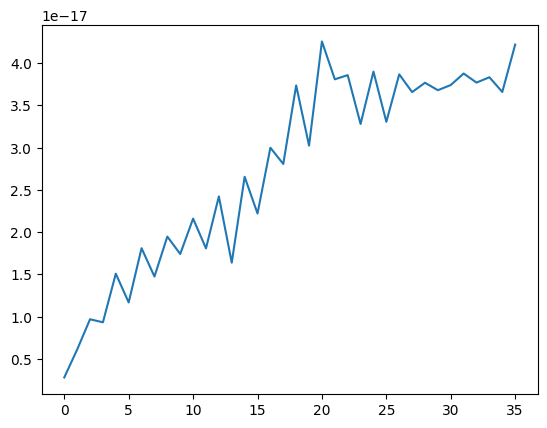

In [ ]:
print(resultat.shape)
plt.plot(resultat)

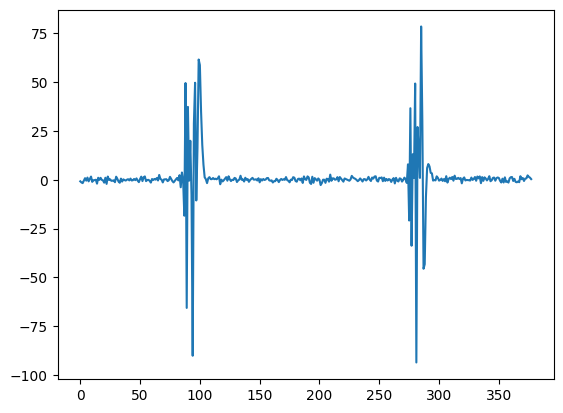

In [ ]:
a = np.array([-8.18808618e-01, -1.39019988e+00, -1.74232476e+00, -4.82174883e-01,
        7.87567236e-01, -4.72998927e-01,  1.09516162e+00, -8.32588992e-01,
        4.28761643e-01,  1.60903993e+00, -1.09095092e+00, -2.70832583e-01,
       -1.91191975e-01, -1.01204697e-02, -2.00659863e+00,  1.00588689e+00,
       -6.84148594e-02,  9.57890940e-01, -8.94211760e-02, -3.37877046e-01,
       -1.51067783e+00,  1.01703224e+00, -2.13880759e+00,  1.63135981e+00,
       -7.47001524e-02,  1.93236694e-01, -5.62005630e-01, -5.03057420e-01,
       -3.12018138e-01, -1.27198371e+00,  1.54652363e+00,  4.37159388e-01,
       -9.30442913e-01, -1.54922459e+00,  5.65424731e-01, -9.41355417e-01,
        1.92190253e-01, -1.86434874e-01, -4.21579006e-01,  1.12488893e-02,
        2.61344772e-01, -3.56800708e-01,  5.71118464e-01, -3.84099012e-01,
       -2.59146707e-01,  3.92150602e-01, -2.22622536e-01,  6.74750416e-01,
       -4.42697645e-01, -1.23708012e+00,  3.36670319e-01,  1.57114014e+00,
       -7.11722795e-01,  1.28934124e+00,  1.67874416e+00, -7.15347354e-01,
       -1.63171621e-01, -5.35831137e-02, -5.49192391e-01, -1.46321182e+00,
        3.49491808e-01, -1.48484486e-01,  3.98831581e-01,  4.17910129e-02,
        8.60680819e-01, -3.91695000e-01,  2.44023131e+00,  3.80195707e-01,
        3.30429999e-02, -1.37802060e+00,  1.41114417e-01,  1.93767810e-01,
        2.52682998e-01, -7.08701595e-01, -2.90788329e-01,  1.47170509e+00,
        4.36125191e-01, -6.86372850e-01, -1.38425554e+00, -5.86089986e-01,
        1.85654855e-01,  9.13340431e-01, -3.33691954e-01,  2.31552450e+00,
       -3.85570136e+00,  3.69027892e+00, -3.42812384e-01, -1.84221808e+01,
        4.94982374e+01, -6.56173306e+01,  3.72628935e+01, -4.81411875e-01,
        1.99382039e+01, -7.78391586e+00, -9.01071724e+01,  2.87905261e+01,
        4.96371922e+01, -1.06103168e+01,  1.62757818e+01,  6.15305677e+01,
        5.86869801e+01,  3.48880086e+01,  1.78394554e+01,  7.71863553e+00,
        1.24486816e+00,  2.67284636e-01, -1.74000094e+00,  6.91025217e-01,
        1.33933780e+00,  3.23747497e-01,  2.80849316e-01,  8.66273359e-01,
        2.86951696e-01,  5.18541332e-01,  2.21651815e-01,  7.49245197e-01,
        1.74979148e+00, -2.32205149e+00,  3.12601439e-02, -8.98372667e-01,
       -2.59919314e-01,  5.05595208e-01,  1.32372843e+00, -4.98651154e-01,
        1.74325154e+00,  2.34352082e-01, -6.86656781e-01, -2.47274412e-02,
       -1.65694089e-01,  9.42176868e-01,  6.22450612e-01, -1.18105786e+00,
       -3.33632194e-01,  5.67964039e-02,  2.02806256e+00, -3.72333777e-02,
        1.54821876e-01, -9.20185634e-01,  1.01089491e+00, -7.87242142e-02,
        3.33090572e-01, -1.07570581e+00, -1.19685351e-01,  4.07621474e-01,
        9.65184035e-01,  7.55645823e-02,  6.81441237e-02,  2.17784388e-01,
       -3.94446900e-01,  7.60359688e-01, -1.33261395e+00,  2.85167764e-01,
       -4.12458513e-01,  3.69170669e-01, -1.23713993e-01,  9.46995199e-02,
        8.25254548e-01,  8.83684557e-01, -3.32848911e-01, -4.87714212e-01,
       -3.39386015e-01, -1.40834806e+00, -7.44312286e-01, -7.35651522e-01,
        4.82173377e-01, -1.26223974e-01, -1.21582696e+00, -1.74457808e-01,
        3.91912496e-01, -1.12126050e-01,  2.55481900e-01, -6.59537549e-02,
        1.34949217e+00, -1.80457654e-01, -5.42239649e-01, -1.32196782e+00,
        4.77738345e-03, -1.51606849e-01,  1.29776284e+00,  1.05108361e+00,
       -6.56765889e-01, -1.01539668e+00,  3.97654862e-01,  5.50034336e-01,
       -2.97733866e-01,  6.40111038e-01, -1.65141693e+00,  1.68784825e+00,
        3.02074015e-01, -1.14217360e-01,  1.69973836e+00,  1.17667306e+00,
       -1.56513687e+00, -2.15804281e+00,  1.53200624e+00, -1.56665430e+00,
        8.24783232e-01,  2.15242670e-01, -4.78967964e-01,  6.44484421e-01,
       -3.10246018e-02, -2.73200885e+00, -1.69600597e+00,  1.00140416e-02,
       -6.62302897e-03, -1.59208660e+00,  5.24598144e-01,  3.03069769e-01,
       -9.96841582e-01,  2.61831214e+00, -5.47435743e-01,  6.87573025e-01,
        6.75267193e-01, -5.57887364e-03,  1.79056124e-01,  1.31146553e+00,
       -7.93271694e-01,  1.36695264e+00,  5.63342122e-01, -2.22814182e-01,
       -9.88364664e-01,  6.36206656e-01,  3.44202864e-01,  1.11547220e-01,
       -1.98085444e-01, -5.16090266e-01,  1.81319103e-01,  1.96881123e+00,
        1.13196862e+00,  7.34000044e-01,  4.36136152e-01, -9.29615954e-02,
       -7.45671092e-01, -2.11514254e-01,  6.65878648e-01, -5.69955095e-02,
       -9.09753366e-01,  2.71920617e-01,  3.01088946e-01, -3.92672987e-01,
        2.19706469e-01,  1.46243101e+00,  6.54615697e-02, -6.52255596e-01,
        1.10221255e+00,  5.69661166e-01,  1.62220758e+00,  1.76489810e+00,
       -4.60636910e-01, -9.20887532e-01,  9.80136078e-01,  8.35970464e-01,
        1.18002007e+00, -7.66208689e-01,  1.06810458e+00, -6.24263339e-01,
        3.76572813e-01, -4.13457960e-01,  3.35060952e-01,  5.23089678e-02,
       -1.12987262e+00,  1.18460911e-01,  8.24261736e-01, -1.90842563e+00,
        9.70611299e-01, -4.58446005e-01, -9.20597159e-01,  6.96772604e-01,
        4.74571139e-01, -9.45073494e-01, -1.32700541e-01,  1.05731410e+00,
        2.72438191e-01, -1.64374355e+00,  7.87329953e+00, -2.08781737e+01,
        3.65870044e+01, -3.37919974e+01,  1.30566692e+01,  1.00277646e+00,
        4.92444328e+01, -9.35535557e+01,  2.69695482e+01,  1.47106737e+01,
        9.22655381e-01,  7.84475254e+01,  2.99756345e+01, -4.55709298e+01,
       -4.32561048e+01, -8.93931637e+00,  5.99879503e+00,  8.02157422e+00,
        6.82023452e+00,  3.52124433e+00,  3.26484113e+00, -4.29967572e-01,
       -1.22545160e-01, -3.52609469e-01,  1.72851658e+00,  9.43206009e-01,
       -4.70203937e-01, -1.22163850e-01,  5.85363082e-01, -6.05479411e-01,
        2.99540238e-01, -7.88595798e-01,  1.82130196e+00, -1.46328027e+00,
        3.57930024e-01,  1.05251463e+00,  3.38298963e-01,  1.39786860e+00,
       -4.86899724e-01,  2.07166044e+00,  4.00072018e-01,  4.22473275e-01,
        9.52786248e-01,  3.19921770e-01,  8.40988634e-01, -1.84783687e+00,
        4.84858515e-01,  1.18045868e+00, -3.84726147e-01, -1.07431080e-01,
       -1.80378982e-01, -2.57103535e-01, -4.29976022e-01,  1.09483353e+00,
       -1.09282924e-01,  4.18055886e-01,  1.38134356e+00, -5.32689195e-01,
        1.63478466e+00,  7.13250719e-01,  1.69904536e+00, -1.77069227e+00,
        1.34250890e+00, -5.80937792e-01,  1.21597794e+00,  6.31900603e-01,
       -3.56078310e-01,  4.30002188e-01,  1.81074860e+00, -7.64687647e-01,
       -2.68592523e-01,  9.42012198e-01,  1.11078307e+00, -5.03923767e-01,
        8.41374919e-01,  1.16037486e+00,  8.64977843e-01, -5.40433333e-01,
       -1.41037545e+00,  5.33552992e-01, -1.41932935e+00,  1.21249905e+00,
       -1.14937224e+00, -8.15051824e-01, -1.45437413e+00,  7.07120979e-01,
        1.30356954e+00,  1.37354756e+00, -6.45120072e-01,  4.49190633e-01,
       -1.11993941e+00, -1.31909576e+00, -9.14245116e-01, -1.25927928e+00,
        1.79727963e+00,  2.75364482e-01,  8.61585811e-01, -6.31635095e-01,
        5.74864982e-01,  6.75789498e-01,  2.20846886e+00,  1.49327283e+00,
        1.05134685e+00,  3.17875446e-01])



plt.plot(a)


13.706903881022079


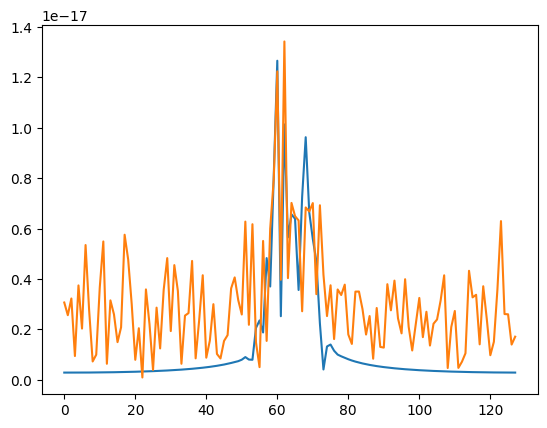

In [ ]:
dt = 10.0    # Sample rate (Nyquist is safely larger than the maximum frequency we will encounter) 
Tobs = 1* YEAR  #Temps d'observation


# number of points in waveform
# if None, will determine inside the code based on amp, f0 (and P2 if running third-body waveform)
N = 128

# number of binaries to batch
num_bin = 100

# fstar = c/(2*np.pi*L)

# parameters
amp1 = 3e-23  # amplitude
f01 = 2e-3  # f0
fdot1 = 7.5e-18  # fdot
fddot1 = 0.0 # fddot
phi01 = 0  # initial phase
iota1 = 0  # inclination
psi1 = 0  # polarization angle
lam1 = 0  # ecliptic longitude
beta_sky1 = 0  # ecliptic latitude

params1 = np.array(
    [amp1, f01, fdot1, fddot1, phi01, iota1, psi1, lam1, beta_sky1,]
)

gb1.run_wave(*params1, N=N, dt=dt, T=Tobs, oversample=2)



freqs1 = gb1.freqs[0]
A0 = gb1.A[0] 
E0 = gb1.E[0]

noise = AnalyticNoise(freqs1)
psd_A = noise.psd(option="A")
asd_A = np.sqrt(psd_A)
psd_E = noise.psd(option="E")
asd_E = np.sqrt(psd_E)

df = freqs1[1] - freqs1[0]

ET = asd_A /np.sqrt(4 * df)

re = ET*np.random.normal(0,1,size=A0.shape)
im = ET*np.random.normal(0,1,size=A0.shape)

Noise = re +1j*im
signal = A0 + Noise

plt.plot(np.abs(A0))
plt.plot(np.abs(signal))

SNR2 = 4.0 * df * np.sum( np.abs(A0)**2 / psd_A ) #+ 4.0 * df * np.sum( np.abs(E0)**2 / psd_E )
SNR = np.sqrt(SNR2)

print(SNR)